<h1><center>Predicting Employees Attrition and Identifing Factors Leading to Attritions <center><h1>

### <h3><center> Muhammad Waqas(F20PWMCS0138) <center><h3>
### <h4><center> MS Computer Science Mini Project <center><h4>

## Project Breakdown
- Importing Libraries, Data and Performing Data Preprocessing (Data UnderStanding, Missing Values, Null Values)
- Exploratory Data Analysis
- ML Model Implementation

## 1. Importing Libraries, Data and Performing Data Preprocessing (Data UnderStanding, Missing Values, Null Values)

In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

##### Showing the Head and Tail of the Dataset

In [2]:
df = pd.read_csv("HR_Analytics.csv.csv")
display(df.head())

print('\n')

display(df.tail())

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

##### Summary of DataSet such as min, max , mean, standard deviation etc

In [3]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [4]:

df.shape

(1470, 35)

In [5]:

df.isna().values.any()

False

##### No Null Values in the Dataset, lets move to the EDA Phase

## 2. Exploratory Data Analysis

#### Attrition is our target variable in the Dataset

##### Counting number of occurrence of 'Yes' and 'No'

In [6]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

##### finding Percentage of 'Yes' and 'No' in Attrition Column and Drawing Histogram based on that percentage

Attrition
No     0.84
Yes    0.16
Name: count, dtype: float64


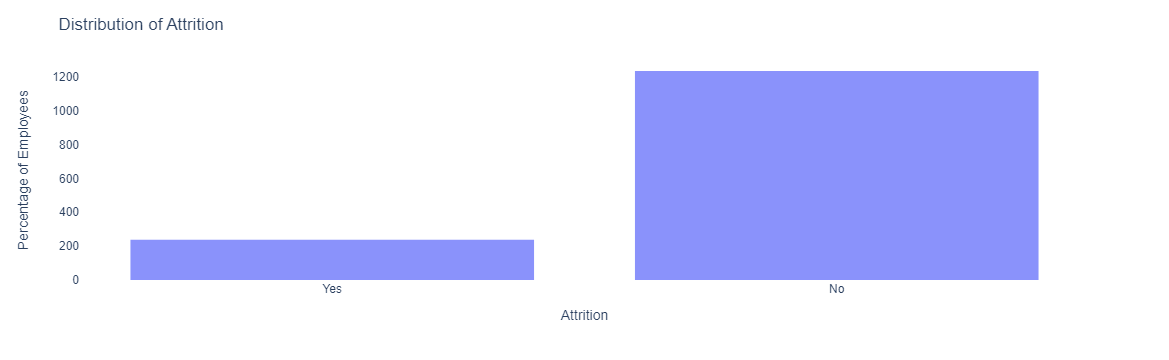

In [7]:
attrition_counts = (df['Attrition'].value_counts() / len(df)).round(2)
print((df['Attrition'].value_counts()/ len(df)).round(2))
fig = px.histogram(df, x='Attrition', nbins=2, color_discrete_sequence=['#636EFA', '#EF553B'],
                labels={'Attrition': 'Attrition', 'count': 'Percentage of Employees'})
fig.update_traces(opacity=0.75)
fig.update_layout(title='Distribution of Attrition', xaxis_title='Attrition', yaxis_title='Percentage of Employees',
                showlegend=False, font=dict(family='Arial', size=12), plot_bgcolor='rgba(0,0,0,0)')
fig.show()

##### Same data with but with PIE Chart 

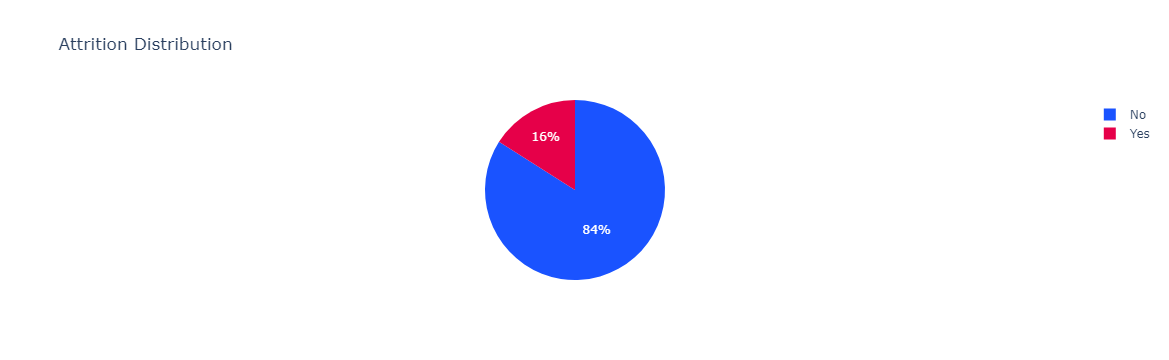

In [8]:
fig = px.pie(values=attrition_counts, names=attrition_counts.index, title='Attrition Distribution ',
             labels={'value': 'Percentage of Employees', 'names': 'Attrition'},color_discrete_sequence=['#1a53ff', '#e60049'])
fig.show()

##### Age Distribution of Employees using Histogram

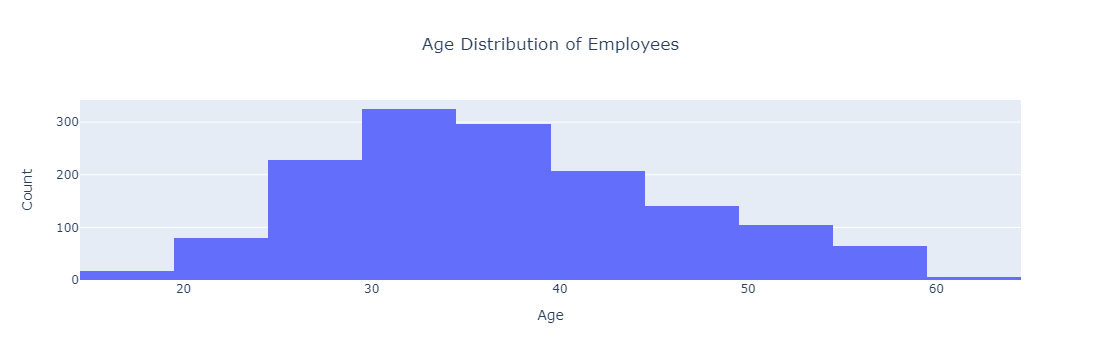

In [9]:
fig = px.histogram(df, x='Age', nbins=20,
                   title='Age Distribution of Employees')
fig.update_layout(xaxis_title='Age', yaxis_title='Count', title = dict(x = 0.5))
fig.show()

##### Age Distribution using Boxplot

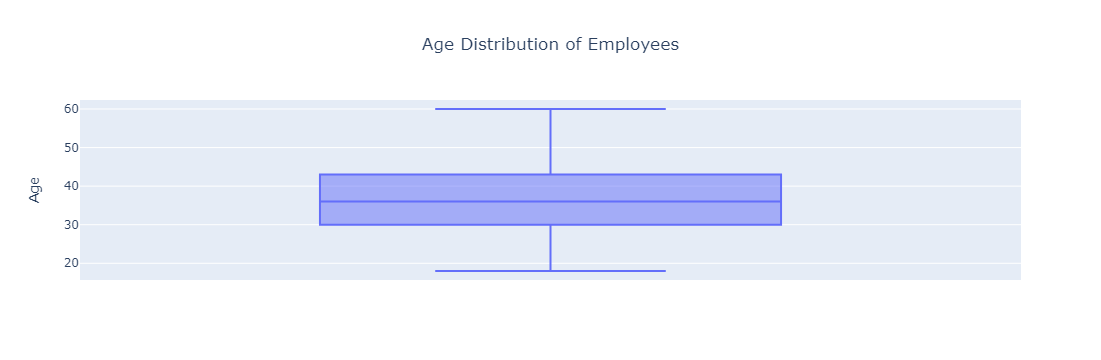

In [10]:
fig = px.box(df, y='Age',
             title='Age Distribution of Employees')
fig.update_layout(yaxis_title='Age', title = dict(x = 0.5))
fig.show()

##### Age Distribution using Barplot

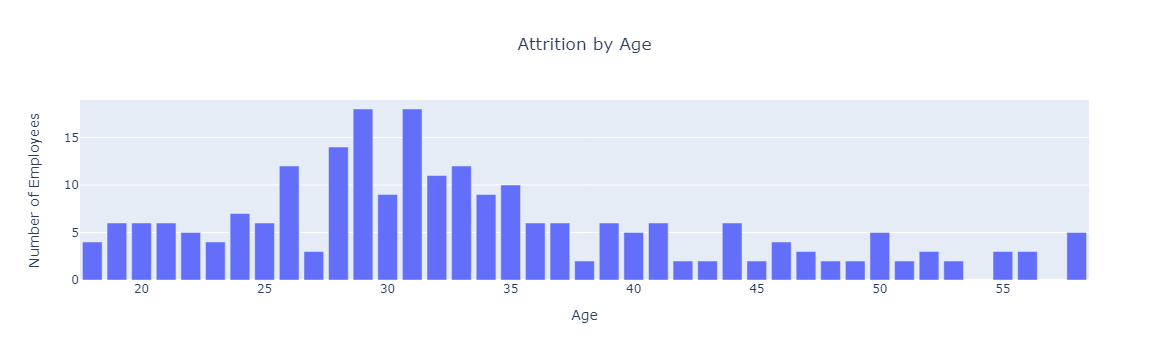

In [11]:
age_attrition = df[df['Attrition'] == 'Yes'].groupby('Age')['Attrition'].count().reset_index()
fig = px.bar(age_attrition, x='Age', y='Attrition',
             title='Attrition by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Employees', title = dict(x = 0.5))
fig.show()

##### Finding Education Field of Employees

In [12]:
print(df['EducationField'].value_counts())

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


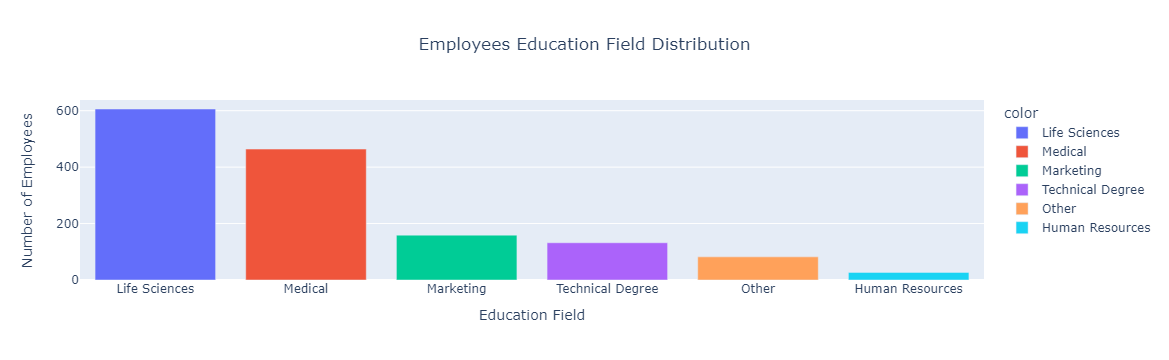

In [13]:
edu_counts = df['EducationField'].value_counts()
fig = px.bar(x=edu_counts.index, y=edu_counts.values, color=edu_counts.index,
             labels={'x': 'Education Field', 'y': 'Number of Employees'}, title='Employees Education Field Distribution')
fig.update_layout(title=dict(x=0.5))
fig.show()

##### Finding Level of Education of Employees

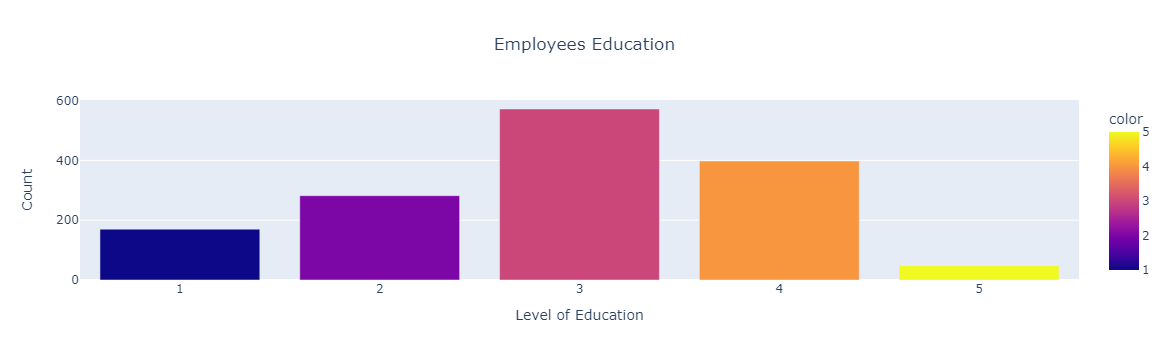

In [14]:
education_df = df['Education'].value_counts().sort_values()
fig = px.bar(x=education_df.index, y=education_df.values, color=education_df.index, title='Employees Education')
fig.update_layout(xaxis_title='Level of Education', yaxis_title='Count',
                  showlegend=False, title_x=0.5)
fig.show()

##### Finding Job Level of Employees

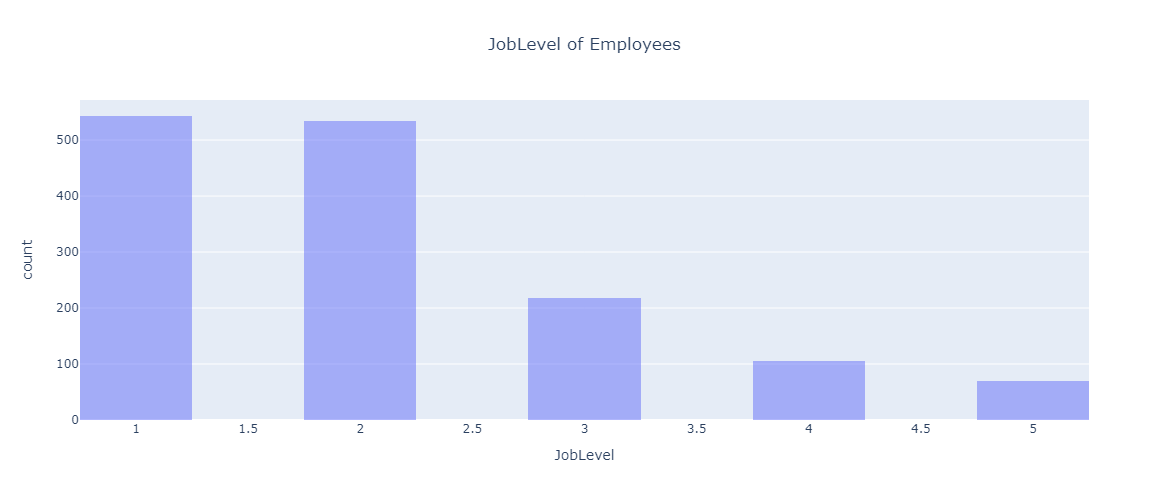

In [15]:
fig = px.histogram(df, x='JobLevel', title='JobLevel of Employees', width=900, height = 500,
                   nbins= 9, barmode='overlay')
fig.update_layout(title = dict(x = 0.5))


fig.show()

##### How many employees work in each department

In [16]:
department_count = df['Department'].value_counts()
print(department_count)

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


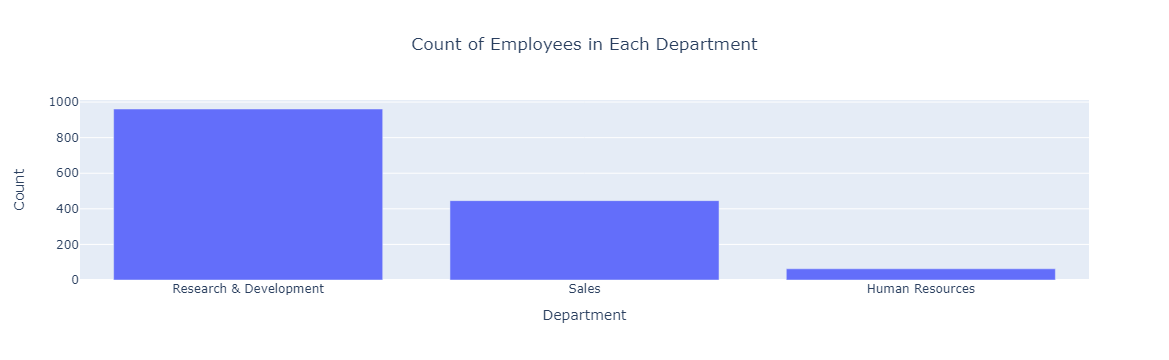

In [17]:
department_count = df['Department'].value_counts()
fig = px.bar(department_count, x=department_count.index, y=department_count.values,
             title='Count of Employees in Each Department')
fig.update_layout(xaxis_title='Department', yaxis_title='Count', showlegend=False, title_x=0.5)
fig.show()

##### Average Monthly income of Departments 

In [18]:
department_salary = df.groupby('Department')['MonthlyIncome'].mean().sort_values(ascending=False)
print(department_salary)

Department
Sales                     6959.172646
Human Resources           6654.507937
Research & Development    6281.252862
Name: MonthlyIncome, dtype: float64


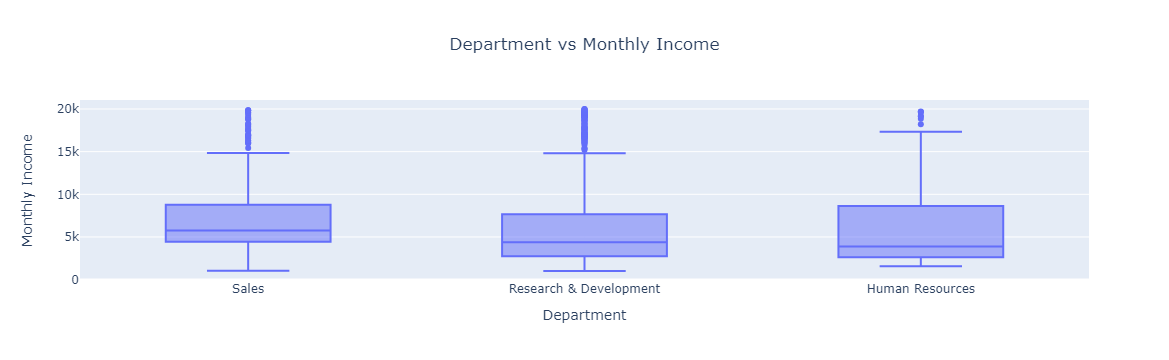

In [19]:
fig = px.box(df, x='Department', y='MonthlyIncome', title='Department vs Monthly Income')
fig.update_layout(xaxis_title='Department', yaxis_title='Monthly Income')
fig.update_layout(title=dict(x=0.5))
fig.show()

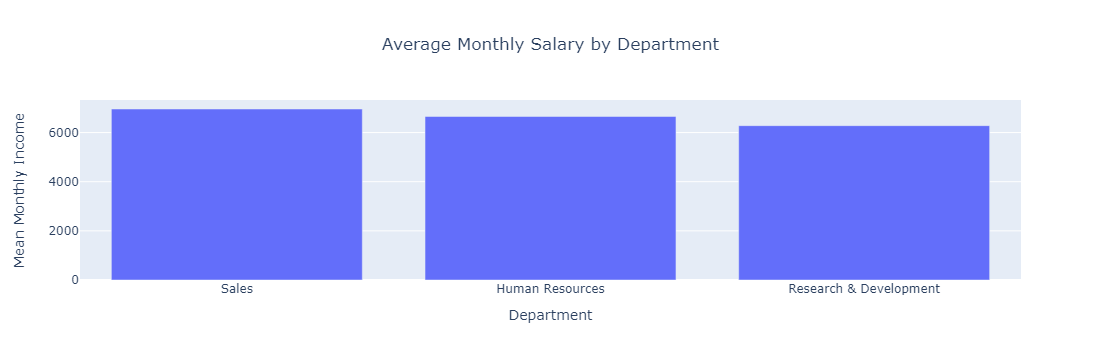

In [20]:
department_salary = df.groupby('Department')['MonthlyIncome'].mean().sort_values(ascending=False)
fig = px.bar(department_salary, x=department_salary.index, y=department_salary.values,
             title='Average Monthly Salary by Department')
fig.update_layout(xaxis_title='Department', yaxis_title='Mean Monthly Income', showlegend=False, title_x=0.5)
fig.show()

##### Average Salary Based on Education Level

In [21]:
ed_level = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
ed_level

Education  MonthlyIncome
0          1    5640.570588
1          2    6226.645390
2          3    6517.263986
3          4    6832.402010
4          5    8277.645833

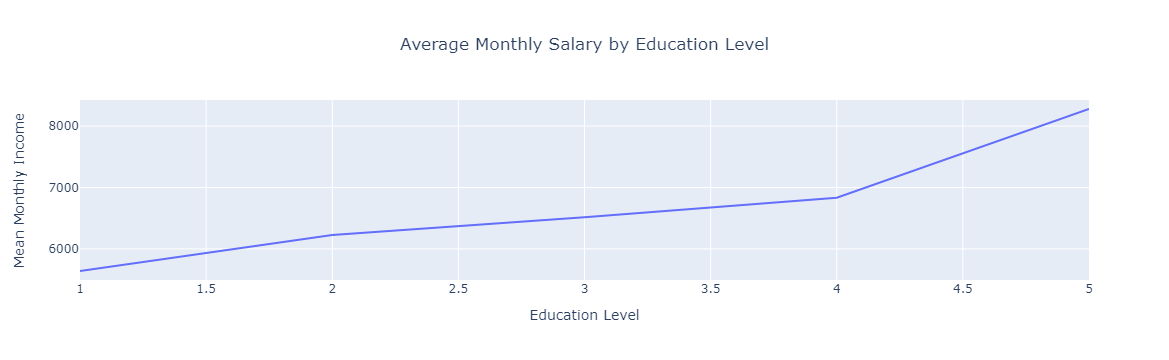

In [22]:
ed_level = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
fig = px.line(ed_level, x='Education', y='MonthlyIncome', title='Average Monthly Salary by Education Level')
fig.update_layout(xaxis_title='Education Level', yaxis_title='Mean Monthly Income', showlegend=False, title_x=0.5)
fig.show()

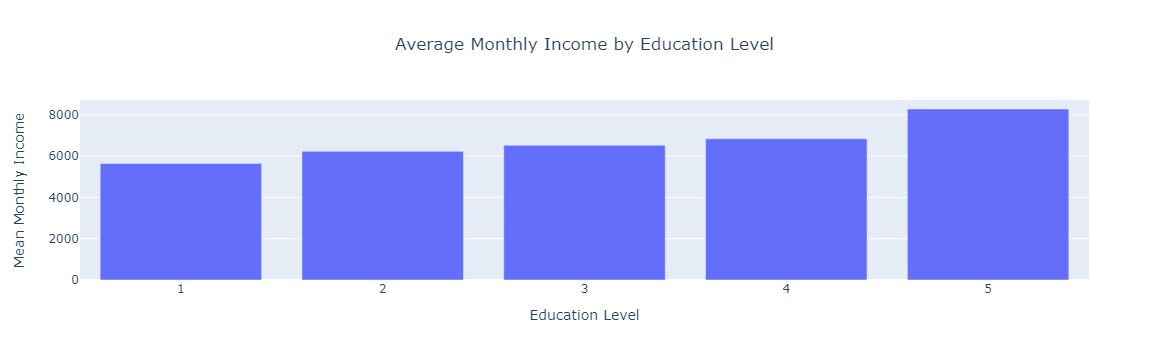

In [23]:
ed_level = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
fig = px.bar(ed_level, x='Education', y='MonthlyIncome', title='Average Monthly Income by Education Level')
fig.update_layout(xaxis_title='Education Level', yaxis_title='Mean Monthly Income', showlegend=False, title_x=0.5)
fig.show()

##### Monthly Salary based on Age

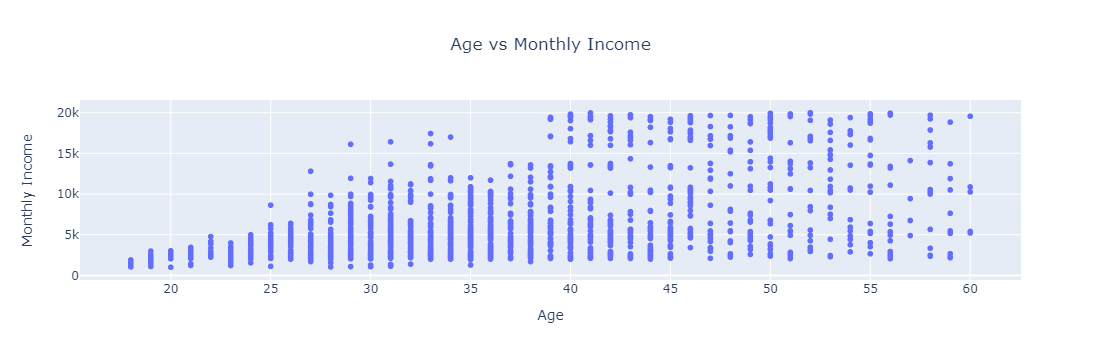

In [24]:
fig = px.scatter(df, x='Age', y='MonthlyIncome',
                 title='Age vs Monthly Income ')
fig.update_layout(xaxis_title='Age', yaxis_title='Monthly Income', title = dict(x = 0.5))
fig.show()

##### Departmental Attrition 

In [25]:
left_df = df[df['Attrition'] == 'Yes']
left_department_count = left_df['Department'].value_counts()
print(left_department_count)

Department
Research & Development    133
Sales                      92
Human Resources            12
Name: count, dtype: int64


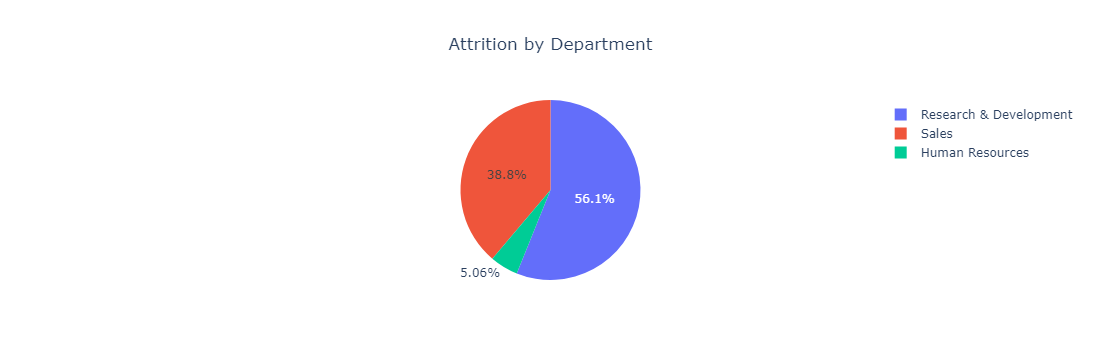

In [26]:
dept_attrition = df[df['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count().reset_index()
fig = px.pie(dept_attrition, values='Attrition', names='Department',
             title='Attrition by Department')
fig.update_layout(title=dict(x=0.5))
fig.show()

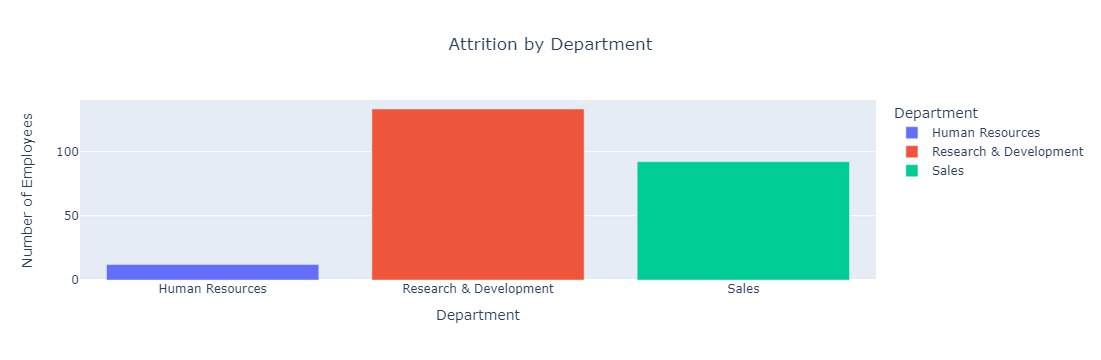

In [27]:
dept_attrition = df[df['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count().reset_index()
fig = px.bar(dept_attrition, x='Department', y='Attrition', color='Department',
             title='Attrition by Department')
fig.update_layout(xaxis_title='Department', yaxis_title='Number of Employees')
fig.update_layout(title=dict(x=0.5))
fig.show()

##### Age grup Distribution of Employees who have left the company 

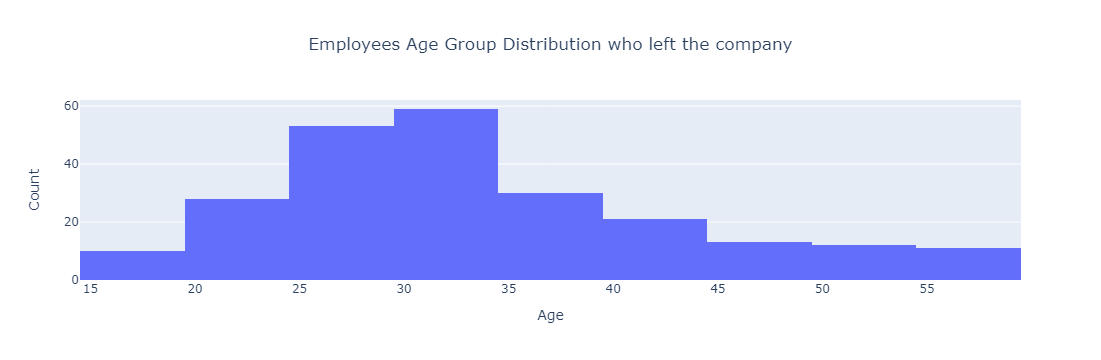

In [28]:
left_df = df[df['Attrition'] == 'Yes']
fig = px.histogram(left_df, x='Age', nbins=20, title='Employees Age Group Distribution who left the company')
fig.update_layout(xaxis_title='Age', yaxis_title='Count', showlegend=False, title_x=0.5)
fig.show()

##### So, it seems like the employees whose age is in between 25 and 34 left frequently. Lets plot this using scatter plot to see actual attrition

##### Actual Age of Employees who have left the company using Pie Chart

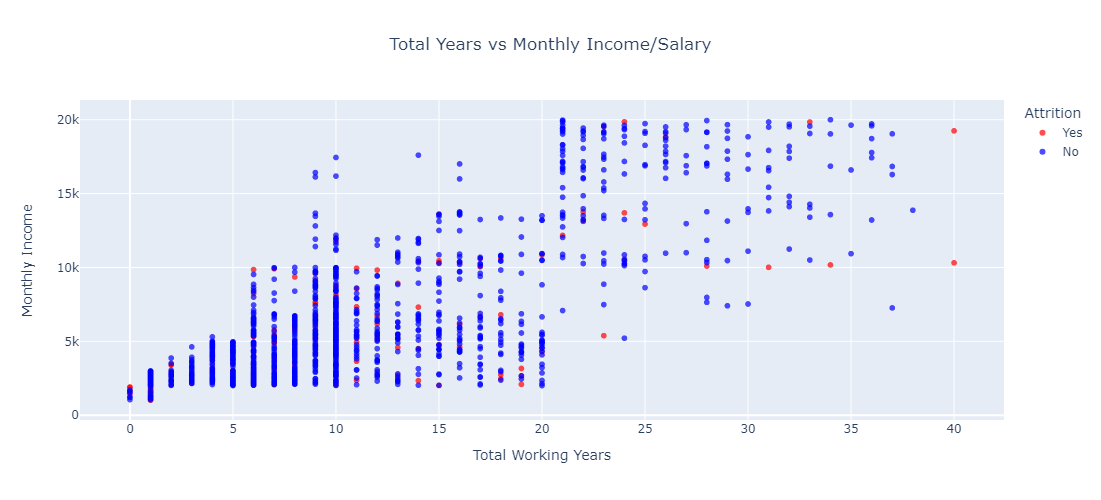

In [29]:
fig = px.scatter(df, x='TotalWorkingYears', y='MonthlyIncome', color='Attrition',
                 title='Total Years vs Monthly Income/Salary', opacity=0.7,
                 color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(title_x=0.5, xaxis_title='Total Working Years', yaxis_title='Monthly Income',
                  title=dict(x=0.5), width=800, height=500)
fig.show()

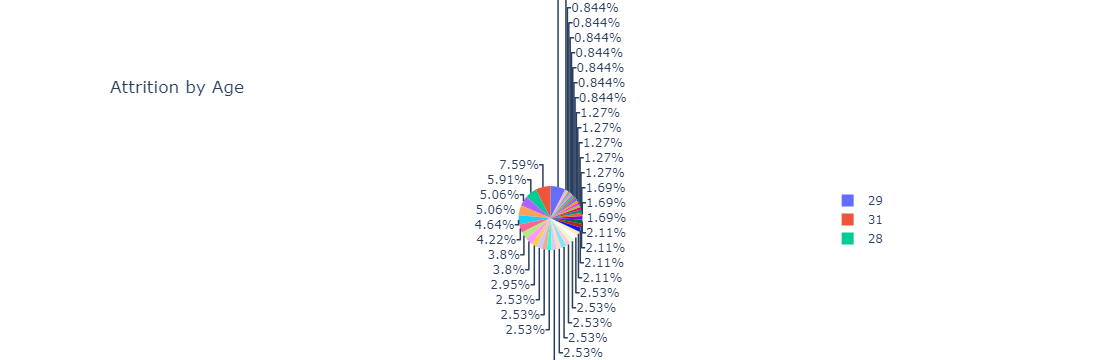

In [30]:
age_attrition = df[df['Attrition'] == 'Yes'].groupby('Age')['Attrition'].count().reset_index()
fig = px.pie(age_attrition, values='Attrition', names='Age',
             title='Attrition by Age')
fig.update_layout(title=dict(x=0.1))
fig.show()

##### Checking Unique Values in the Dataset that has low/no Impact 

In [31]:
for col in df.columns:
    
    if df[col].dtype == object:
        
        print(f'{col}: {df[col].unique()}')
        
        
        print(df[col].value_counts())
        
        
        print('--------------------------')

Attrition: ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------------
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------
Department: ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------
Gender: ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------------
JobRole: ['Sales Executive' '

In [32]:
features = list(df.columns)
features.remove('Attrition')

uniques = []


for f in features:
    item = {'feature':f}
    count = len(df[f].unique())
    item['unique'] = count
    if count < 10:
        item['values'] = df[f].unique().tolist()
    elif count < df.shape[0]:
        item['values'] = df[f].unique().tolist()[:10] + ['...']
    else:
        item['values'] = ['All values are unique']
    uniques.append(item)


uniquess = pd.DataFrame(uniques).set_index('feature')


uniquess.style.background_gradient(subset=['unique'], cmap='Reds')

##### Identified 4 Columns that have unique values and have no impact/very low impact on our Dataset and result so we will be dropping it from our ataset

In [33]:
df.drop(['StandardHours','Over18','EmployeeCount','EmployeeNumber','OverTime'], axis = 1, inplace=True), 

(None,)

In [34]:
numeric_cols = df.select_dtypes(include=np.number)


corr_matrix = numeric_cols.corr()
corr_matrix

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

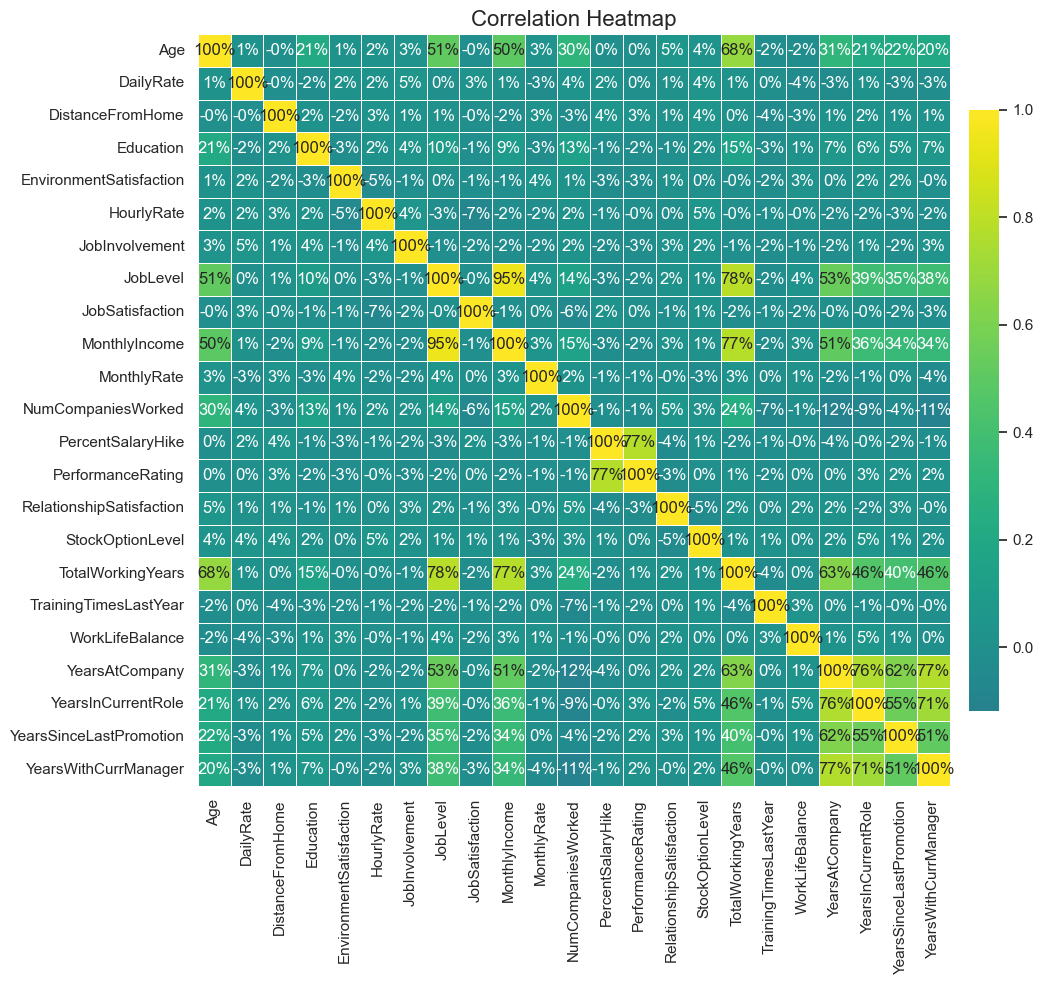

In [35]:
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

# Create a figure and axis with custom styling
plt.figure(figsize=(12, 10))
sns.set(style="white")  # Set the background style

# Create the heatmap with a different color map - 'viridis'
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.0%',
            cmap='viridis',  # Change the color map to 'viridis'
            center=0,
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "pad": 0.02},
            annot_kws={"fontsize": 12})

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = df[column].astype(str)
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\kwaqa\AppData\Local\Temp\ipykernel_8708\623447006.py:2: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

C:\Users\kwaqa\AppData\Local\Temp\ipykernel_8708\623447006.py:2: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

C:\Users\kwaqa\AppData\Local\Temp\ipykernel_8708\623447006.py:2: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

C:\Users\kwaqa\AppData\Local\Temp\ipykernel_8708\623447006.py:2: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

C:\Users\kwaqa\AppData\Local\Temp\ipykernel_8708\623447006.py:2: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a 

In [37]:

df['Age_Years'] = df['Age']
df = df.drop('Age', axis = 1)
df

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1               2         62           2                 0   
1             0               1        430           1                27   
2             1               2        261           1                11   
3             0               1        277           1                22   
4             0               2        629           1                11   
...         ...             ...        ...         ...               ...   
1465          0               1        811           1                15   
1466          0               2        644           1                25   
1467          0               2        356           1                23   
1468          0               1         11           2                11   
1469          0               2        653           1                27   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             1               1                        1       0          65   
1             0               1                        2       1          32   
2             1               4                        3       1          63   
3             3               1                        3       0          27   
4             0               3                        0       1          11   
...         ...             ...                      ...     ...         ...   
1465          1               3                        2       1          12   
1466          0               3                        3       1          13   
1467          2               1                        1       1          58   
1468          2               3                        3       1          34   
1469          2               3                        1       1          53   

      ...  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0     ...                         0                 0                 38   
1     ...                         3                 1                  2   
2     ...                         1                 0                 37   
3     ...                         2                 0                 38   
4     ...                         3                 1                 36   
...   ...                       ...               ...                ...   
1465  ...                         2                 1                  9   
1466  ...                         0                 1                 39   
1467  ...                         1                 1                 36   
1468  ...                         3                 0                  9   
1469  ...                         0                 0                 36   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                0              33   
1                         3                2               2   
2                         3                2               0   
3                         3                2              35   
4                         3                2              12   
...                     ...              ...             ...   
1465                      3                2              32   
1466                      5                2              34   
1467                      0                2              33   
1468                      3                1              36   
1469                      3                3              30   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                     13                        0                    13   
1                     16                        1                    15   
2                      0                        0                     0   
3                     16                        9                     0   
4                     11                        8                    10   


## 3. ML Model Implementation

##### Split the data into independent 'X' and dependent 'Y' variables

In [38]:
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [39]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100],         
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}


rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [40]:
precision_0 = 0.88
recall_0 = 1.00
support_0 = 255

precision_1 = 0.80
recall_1 = 0.10
support_1 = 39

accuracy = (precision_0 * support_0 + precision_1 * support_1) / (support_0 + support_1)
print("Accuracy:", accuracy)

Accuracy: 0.8693877551020409


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)


y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8707482993197279


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)


rf_model.fit(X_train, y_train)


y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.935374149659864
Test Accuracy: 0.8741496598639455


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_test_pred = best_model.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)

# Showing all the columns that had a high impact on the model 
#using "Feature_importances" function of the Random Forest Classier Model
importances = pd.DataFrame({'feature': df.columns[1:], 'importance': np.round(best_model.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
print(importances)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.8707482993197279
                          importance
feature                             
MonthlyIncome                  0.073
Age_Years                      0.067
MonthlyRate                    0.059
HourlyRate                     0.057
DailyRate                      0.056
TotalWorkingYears              0.048
DistanceFromHome               0.044
NumCompaniesWorked             0.043
YearsAtCompany                 0.041
PercentSalaryHike              0.038
StockOptionLevel               0.037
JobRole                        0.036
YearsWithCurrManager           0.035
YearsInCurrentRole             0.031
TrainingTimesLastYear          0.031
JobLevel                       0.030
JobSatisfaction                0.028
YearsSinceLastPromotion        0.028
MaritalStatus                  0.028
JobInvolvement                 0.026
EnvironmentSatisfaction        0.026
Relationsh

##### Visualizing the table 

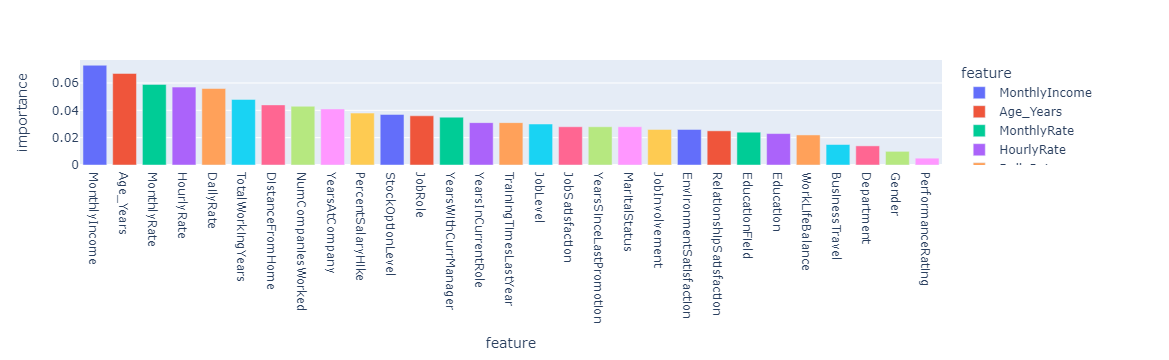

In [44]:
fig = px.bar(importances, x=importances.index, y='importance', color=importances.index, height=600)
fig.show()

In [1]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)


y_test_pred = rf_model.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)


print("Classification Report:\n", classification_report(y_test, y_test_pred))


cv_scores = cross_val_score(rf_model, X, Y, cv=5, scoring='accuracy')

print("Test Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

NameError: name 'X' is not defined

In [2]:
from sklearn import train_test_split

ImportError: cannot import name 'train_test_split' from 'sklearn' (C:\Users\kwaqa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\__init__.py)